In [1]:
from yahoo_fin.stock_info import get_data
import pandas as pd
import numpy as np

In [96]:
from numpy import linalg
import matplotlib.pyplot as plt

In [2]:
def get_market_data_for_stock(start_date, end_date, ticker_symbol):
    data_point = get_data(ticker_symbol, 
                          start_date=start_date, 
                          end_date=end_date, 
                          index_as_date = True, 
                          interval="1d")['close']
    return data_point

In [4]:
start_date = '2023-01-01'
end_date = '2023-08-01'

In [5]:
df_stock = pd.DataFrame()
ticker_list = ['AAPL', 'MSFT']
for _ticker in ticker_list:
    df_stock[_ticker] = get_market_data_for_stock(start_date, end_date, _ticker)
print(df_stock)

                  AAPL        MSFT
2023-01-03  125.070000  239.580002
2023-01-04  126.360001  229.100006
2023-01-05  125.019997  222.309998
2023-01-06  129.619995  224.929993
2023-01-09  130.149994  227.119995
...                ...         ...
2023-07-25  193.619995  350.980011
2023-07-26  194.500000  337.769989
2023-07-27  193.220001  330.720001
2023-07-28  195.830002  338.369995
2023-07-31  196.449997  335.920013

[144 rows x 2 columns]


In [17]:
def get_stock_returns(df_stock):
    new_df = df_stock.pct_change(1).tail(-1)
    return new_df

def get_expected_returns(df_stock):
    new_df = df_stock.mean()
    return new_df

def get_covariance_matrix(df_stock):
    return df_stock.cov()

In [24]:
df_stock_returns = get_stock_returns(df_stock)
df_stock_expected_return = get_expected_returns(df_stock_returns)
df_stock_cov_matrix = get_covariance_matrix(df_stock_returns)


In [63]:
mean_return_vector = np.expand_dims(df_stock_expected_return.to_numpy(), axis = 0).T
return_cov_matrix = df_stock_cov_matrix.to_numpy()
N = mean_return_vector.shape[0]

We have the Expected value of the return as well as the covariance matrix. Now we do the markowitz optimisation
### Markowitz Min-variance portfolio

In [89]:
def calculate_matrix_inv(matrix):
    return linalg.inv(matrix)

def calculate_scalar_product(X, cov_matrix_inv, Y):
    X_T = X.T
    ret_param = np.dot(X_T, np.dot(cov_matrix_inv, Y))
    return ret_param

def get_investment_portfolio(mean_return, cov_matrix, N):
    cov_matrix_inv = calculate_matrix_inv(cov_matrix)
    vector_of_ones = np.ones((N, 1))
    a = calculate_scalar_product(vector_of_ones, cov_matrix_inv, vector_of_ones)
    inv_port = 1/a*(np.dot(cov_matrix_inv, vector_of_ones))
    return inv_port

def get_sf_portfolio(mean_return, cov_matrix, N):
    cov_matrix_inv = calculate_matrix_inv(cov_matrix)
    vector_of_ones = np.ones((N,1))
    a = calculate_scalar_product(vector_of_ones, cov_matrix_inv, vector_of_ones)
    b = calculate_scalar_product(mean_return, cov_matrix_inv, vector_of_ones)
    J = mean_return - (b / a)*vector_of_ones
    norm_of_J = linalg.norm(J)
    W = (1 / norm_of_J*norm_of_J)*np.dot(cov_matrix_inv, J)
    return W

In [90]:
investment_portfolio = get_investment_portfolio(mean_return_vector, return_cov_matrix, N)

In [91]:
sf_portfolio = get_sf_portfolio(mean_return_vector, return_cov_matrix, N)

In [92]:
vector_of_ones = np.ones((N, 1))
cov_matrix_inv = calculate_matrix_inv(return_cov_matrix)
a = calculate_scalar_product(vector_of_ones, cov_matrix_inv, vector_of_ones)
b = calculate_scalar_product(mean_return_vector, cov_matrix_inv, vector_of_ones)
mean_return_of_sf = linalg.norm(mean_return_vector - (b/a)*vector_of_ones)
vol_sf = 1
vol_if = 1/(a**0.5)
mean_return_of_if = b / a

In [115]:
return_of_portfolios = []
risk_of_portfolios = []
for x in range(100000):
    # target_m = MIN_VAL + x*increment
    # coeff = target_m - b/a
    coeff = x / 10000000
    F = investment_portfolio + coeff * sf_portfolio
    return_of_portfolios.append(float(mean_return_of_if + coeff * mean_return_of_sf))
    risk_of_portfolios.append(float((vol_if**2 + coeff**2)**0.5))

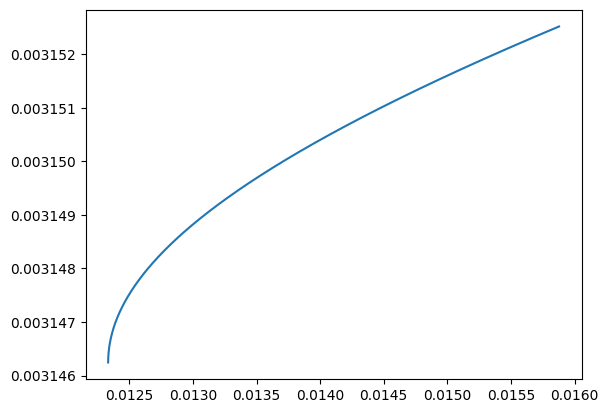

In [116]:
plt.plot(risk_of_portfolios, return_of_portfolios)
plt.show()